Here we will be using the wine quality data set . 

This data set contains various chemical properties of wine, such as

1. acidity
2. sugar
3. pH
4. alcohol 

It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`

# **Using Model LOGISTIC REGRESSION**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

## **An Overview  of Data**

In [ ]:
pd.read_csv("/content/Wine_Quality_Data.csv",sep=',')

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
data=pd.read_csv("/content/Wine_Quality_Data.csv",sep=',')

In [ ]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [ ]:
data.dtypes.value_counts()

float64    11
int64       1
object      1
dtype: int64

In [ ]:
data.color.value_counts()

white    4898
red      1599
Name: color, dtype: int64

we can see that the classes arent balanced its an imbalanced dataset

## **Encoding column(outcome) color**

as sklearn cant take strings

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['color']=le.fit_transform(data.color)

In [ ]:
data['color']

0       0
1       0
2       0
3       0
4       0
       ..
6492    1
6493    1
6494    1
6495    1
6496    1
Name: color, Length: 6497, dtype: int64

so we can see that our color which is basically red and white has been encoded as 0 and 1 respectively

## **Understanding correlation,Training and testing samples**

In [ ]:
import matplotlib.pyplot as plt


                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000          0.219008     0.324436   
volatile_acidity           0.219008          1.000000    -0.377981   
citric_acid                0.324436         -0.377981     1.000000   
residual_sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free_sulfur_dioxide       -0.282735         -0.352557     0.133126   
total_sulfur_dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   
color                     -0.486740         -0.653036     0.187397   

                   

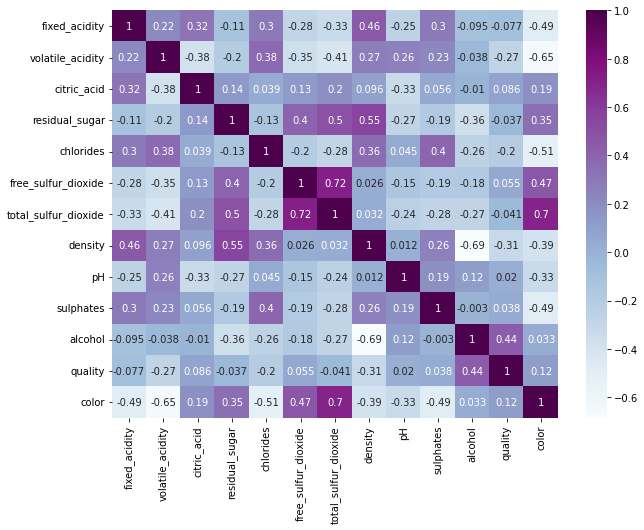

In [ ]:
corr_var=data.corr()
print(corr_var)
plt.figure(figsize=(10,7.5))
sns.heatmap(corr_var, annot=True, cmap='BuPu')

We need to separate dependent and independent features before modeling

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (4547, 12)
y_train: (4547,)
X_test: (1950, 12)
y_test: (1950,)


## **Scaling**
As we have different features, each has different scaling or range, we need to do scaling for better accuracy during training and for new dataset

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## **Model Fitting**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, pred)
print(cm)

[[ 474    4]
 [   5 1467]]


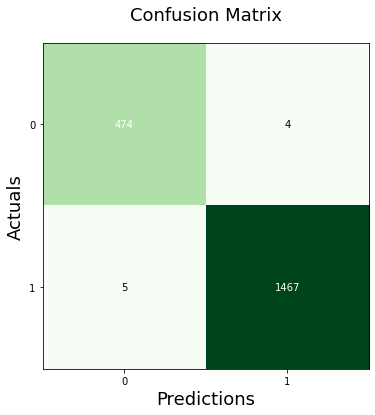

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## **Metrics like Accuracy of our model**

In [ ]:
logreg=accuracy_score(y_test,pred)
logreg

0.9953846153846154

In [ ]:
roc_auc_score(y_test, pred)

0.9941175300163725

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       478
           1       1.00      1.00      1.00      1472

    accuracy                           1.00      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       1.00      1.00      1.00      1950



# **Using Model KNN**

## **Overview of Data**

In [ ]:
data2=data=pd.read_csv("/content/Wine_Quality_Data.csv",sep=',')

In [ ]:
data2.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

In [ ]:
data2.dtypes.value_counts()

float64    11
int64       1
object      1
dtype: int64

## **Encoding colour column**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
data2['color']=le1.fit_transform(data.color)

## **Training and Testing Samples**

In [ ]:
#create a dataframe with all training data except the target column
X = data2.drop(columns=['color'])
#check that the target variable has been removed
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#separate target values
y = data2['color'].values
#view target values
y[0:5]

array([0, 0, 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
print('Total no. of samples: Training and Testing dataset separately!')
print('X_train:', np.shape(X_train))
print('y_train:', np.shape(y_train))
print('X_test:', np.shape(X_test))
print('y_test:', np.shape(y_test))

Total no. of samples: Training and Testing dataset separately!
X_train: (4547, 12)
y_train: (4547,)
X_test: (1950, 12)
y_test: (1950,)


## **Model Fitting**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
predk=knn.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, predk)
print(cm)

[[ 413   67]
 [  50 1420]]


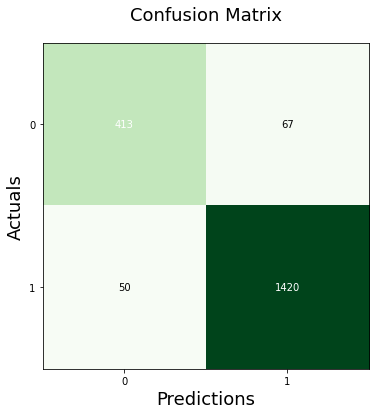

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## **Metrics like score**

In [ ]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.94

In [ ]:
KNNre=accuracy_score(y_test,predk)
KNNre

0.94

In [ ]:
roc_auc_score(y_test, predk)

0.9132015306122448

In [ ]:
import sklearn.metrics as metrics
print(metrics.classification_report(y_test, predk))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       480
           1       0.95      0.97      0.96      1470

    accuracy                           0.94      1950
   macro avg       0.92      0.91      0.92      1950
weighted avg       0.94      0.94      0.94      1950

